# Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import joblib
%matplotlib inline

# Data Collection and Processing

In [3]:
Bigbazaar_data = pd.read_csv('Bigbazaar_sales_data.csv')

In [5]:
Bigbazaar_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
Bigbazaar_data.shape

(8523, 12)

In [7]:
Bigbazaar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



# checking for missing values

In [8]:
Bigbazaar_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling Missing Values

Mean --> average

Mode --> more repeated value

In [9]:
Bigbazaar_data['Item_Weight'].mean()

12.857645184135976

In [10]:
# filling the missing values in "Item_weight column" with "Mean" value

Bigbazaar_data['Item_Weight'].fillna(Bigbazaar_data['Item_Weight'].mean(), inplace=True)

In [11]:
Bigbazaar_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
# filling the missing values in "Outlet_Size" column with Mode

mode_of_Outlet_size = Bigbazaar_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [13]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
miss_values = Bigbazaar_data['Outlet_Size'].isnull()   

In [15]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
Bigbazaar_data.loc[miss_values, 'Outlet_Size'] = Bigbazaar_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [17]:
# checking for missing values
Bigbazaar_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [18]:
Bigbazaar_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features

In [19]:
sns.set()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21268\3191941252.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bigbazaar_data['Item_Weight'])


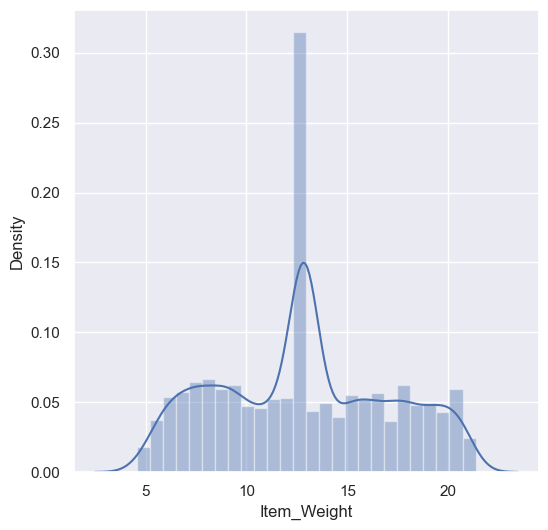

In [20]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(Bigbazaar_data['Item_Weight'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21268\4246791400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bigbazaar_data['Item_Visibility'])


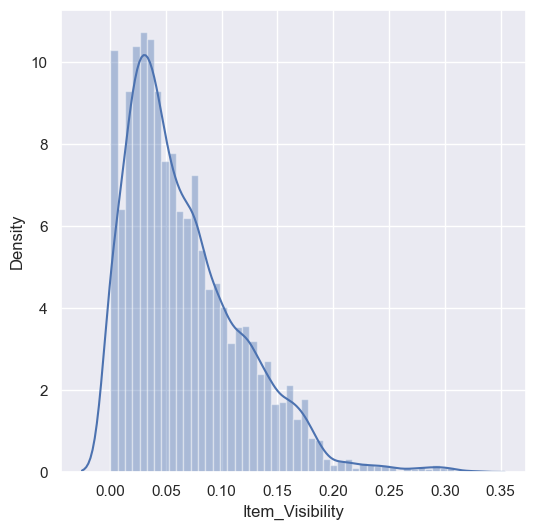

In [21]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(Bigbazaar_data['Item_Visibility'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21268\159663050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bigbazaar_data['Item_MRP'])


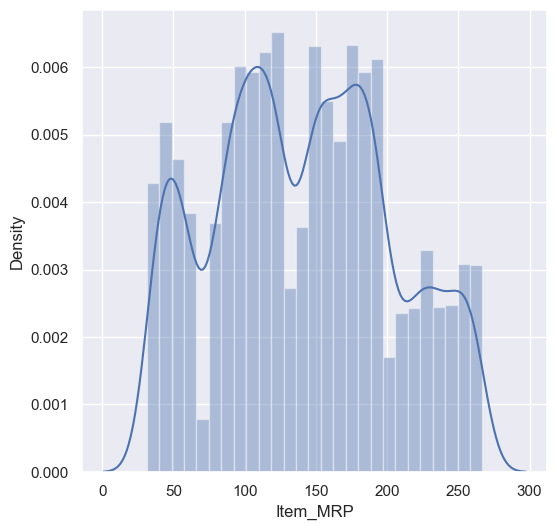

In [22]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(Bigbazaar_data['Item_MRP'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21268\443139890.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bigbazaar_data['Item_Outlet_Sales'])


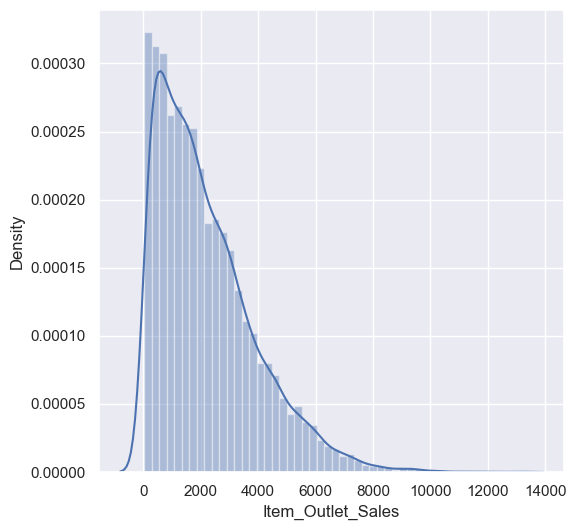

In [23]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(Bigbazaar_data['Item_Outlet_Sales'])
plt.show()

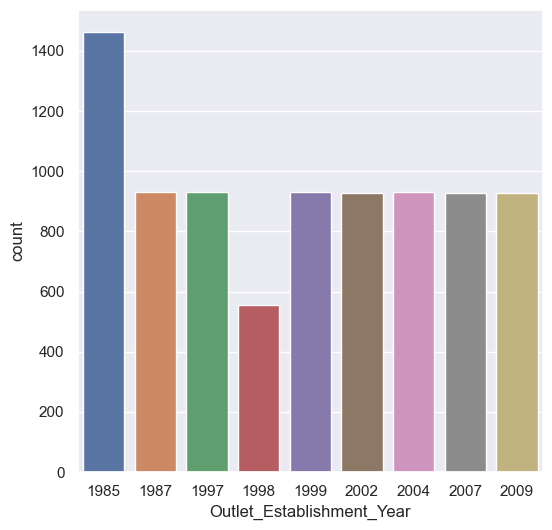

In [24]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=Bigbazaar_data)
plt.show()

# Categorical Features

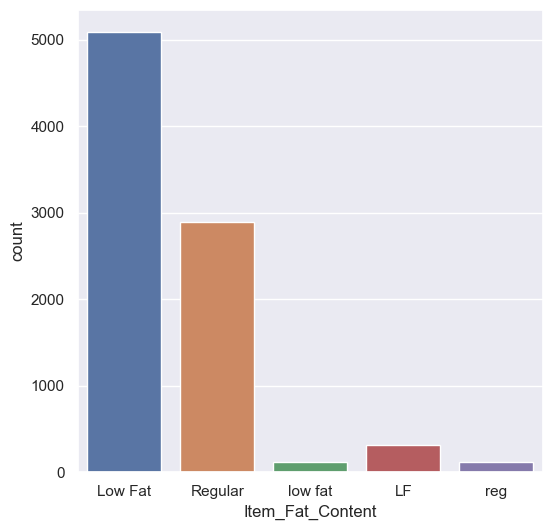

In [25]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=Bigbazaar_data)
plt.show()

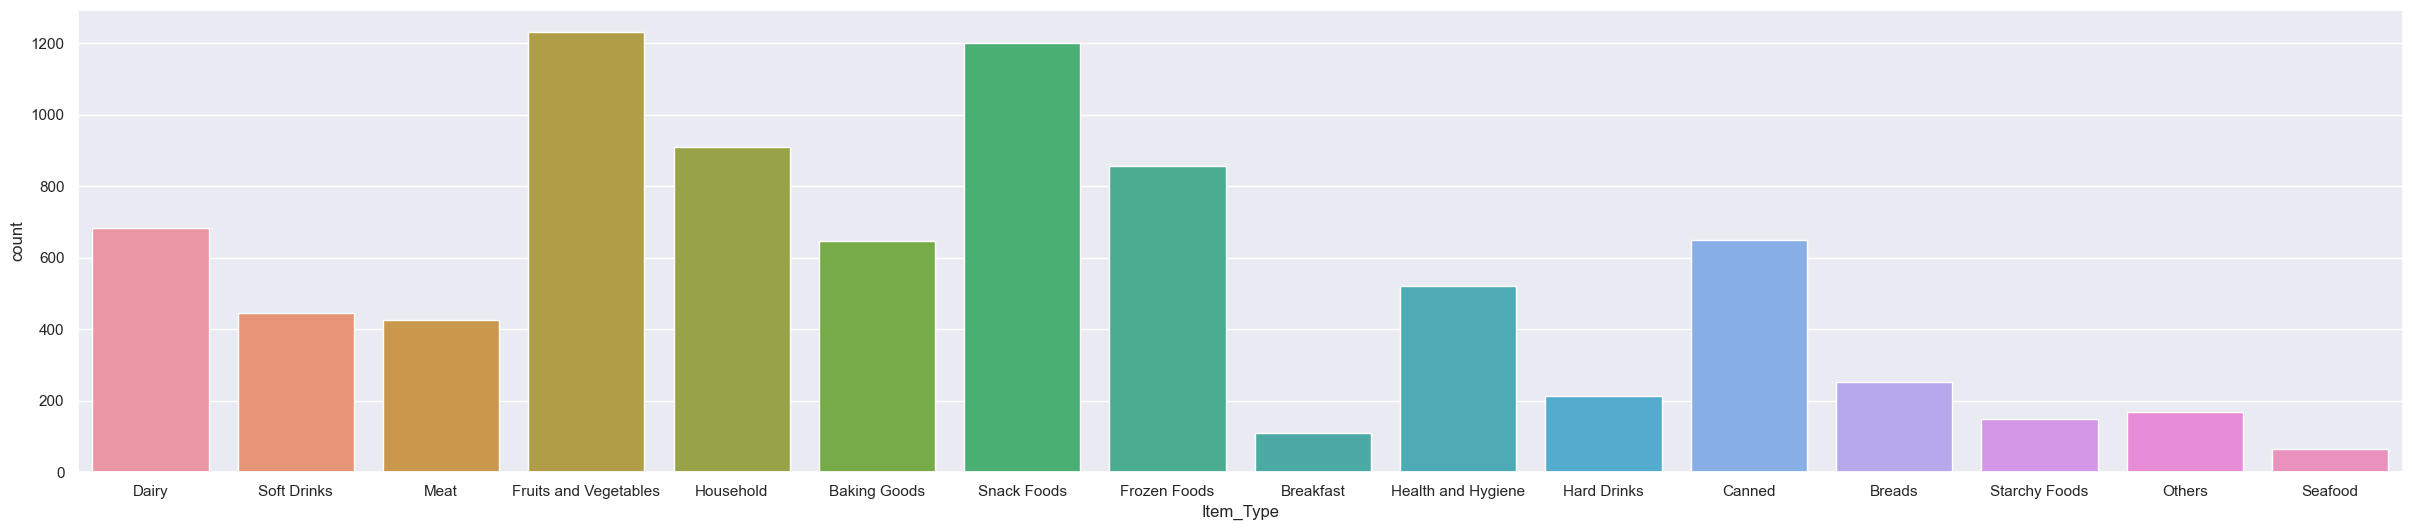

In [26]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=Bigbazaar_data)
plt.show()

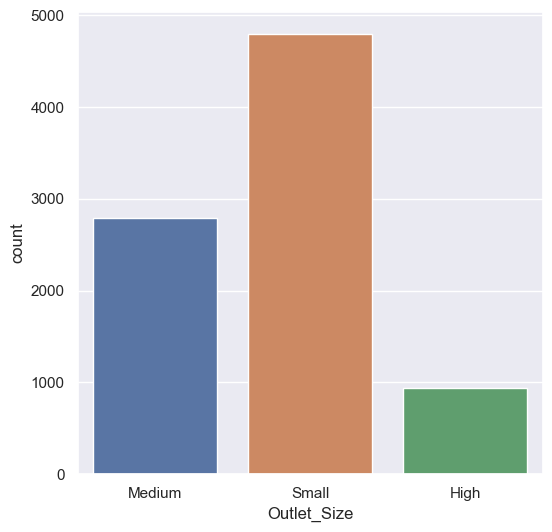

In [27]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=Bigbazaar_data)
plt.show()

# EDA using Klib Library

In [28]:
import klib

<Axes: xlabel='Item_Weight', ylabel='Density'>

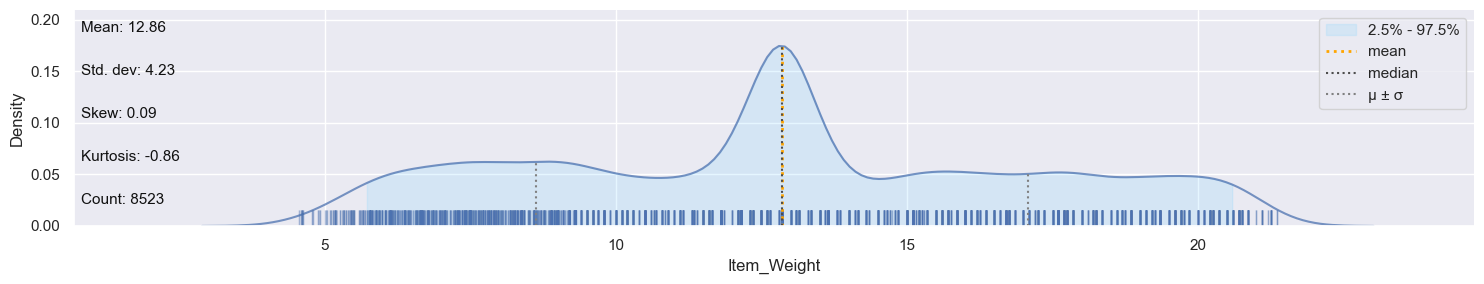

In [29]:
# returns a distribution plot for every numeric feature
klib.dist_plot(Bigbazaar_data) 


In [30]:
# returns a color-encoded correlation matrix
klib.corr_mat(Bigbazaar_data) 


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

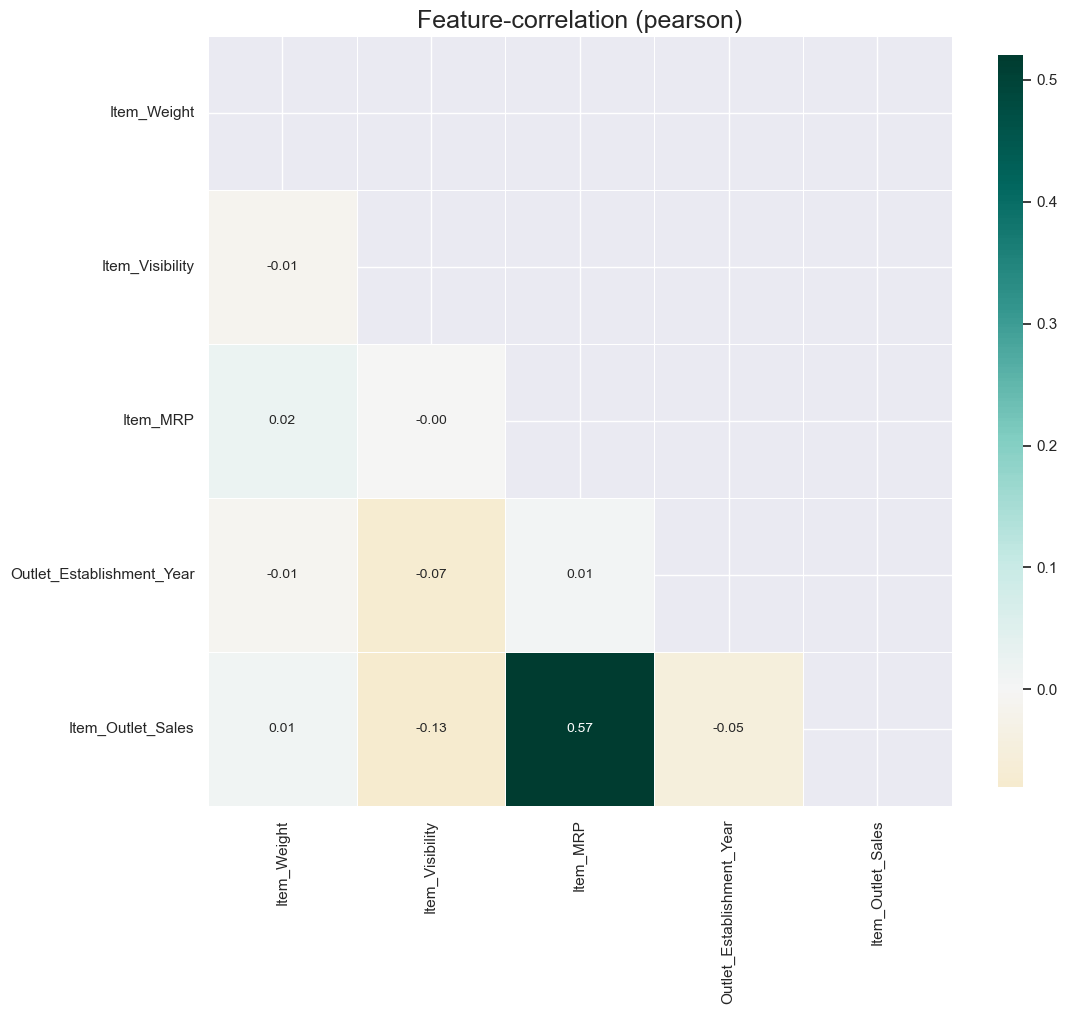

In [31]:
# returns a color-encoded heatmap
klib.corr_plot(Bigbazaar_data)


# Data Pre-Processing

In [32]:
Bigbazaar_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
Bigbazaar_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
Bigbazaar_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [35]:
Bigbazaar_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [36]:
encoder = LabelEncoder()

In [37]:
Bigbazaar_data['Item_Identifier'] = encoder.fit_transform(Bigbazaar_data['Item_Identifier'])

Bigbazaar_data['Item_Fat_Content'] = encoder.fit_transform(Bigbazaar_data['Item_Fat_Content'])

Bigbazaar_data['Item_Type'] = encoder.fit_transform(Bigbazaar_data['Item_Type'])

Bigbazaar_data['Outlet_Identifier'] = encoder.fit_transform(Bigbazaar_data['Outlet_Identifier'])

Bigbazaar_data['Outlet_Size'] = encoder.fit_transform(Bigbazaar_data['Outlet_Size'])

Bigbazaar_data['Outlet_Location_Type'] = encoder.fit_transform(Bigbazaar_data['Outlet_Location_Type'])

Bigbazaar_data['Outlet_Type'] = encoder.fit_transform(Bigbazaar_data['Outlet_Type'])

In [38]:
Bigbazaar_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [39]:
X = Bigbazaar_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = Bigbazaar_data['Item_Outlet_Sales']

In [40]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [41]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting the data into Training data & Testing Data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Standarization 

In [44]:
X.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.453596,1.112871,1.201220
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.683084,0.812757,0.796459
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [45]:
sc= StandardScaler()

In [46]:
X_train_std= sc.fit_transform(X_train)

In [47]:
X_test_std= sc.transform(X_test)

In [48]:
X_train_std

array([[-0.33996056, -0.24151059,  1.36378126, ...,  0.79358899,
        -1.36460015, -0.24534917],
       [ 0.48097841,  0.00834025, -0.73325542, ..., -0.66836447,
         1.09868919,  2.27771359],
       [ 0.77242287, -1.2041606 , -0.73325542, ...,  0.79358899,
        -1.36460015, -0.24534917],
       ...,
       [ 0.42090971,  1.38849802,  1.36378126, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [-1.61252721, -0.93131133, -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [ 1.0727664 , -1.46283587,  1.36378126, ..., -0.66836447,
         1.09868919,  1.01618221]])

In [49]:
X_test_std

array([[-0.63140502,  0.00834025, -0.73325542, ..., -0.66836447,
         1.09868919,  2.27771359],
       [-0.88502844, -0.15882899, -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [ 0.95040422, -1.65890937, -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       ...,
       [ 1.1261608 ,  1.48299127, -0.73325542, ...,  0.79358899,
        -0.13295548, -0.24534917],
       [-0.05296564,  1.38849802, -0.73325542, ..., -0.66836447,
         1.09868919,  1.01618221],
       [ 0.14503861, -1.4274009 ,  1.36378126, ...,  0.79358899,
        -0.13295548, -0.24534917]])

In [50]:
Y_train

7173    1662.5026
3315    2956.1520
5932    2490.0920
7872     988.7130
5946      45.9402
          ...    
1099    1957.4520
2514    2013.3792
6637    2006.7212
2575    1372.2138
7336    1830.9500
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [51]:
Y_test

1112    1544.6560
1751    6404.9960
7648    1070.6064
7362     369.5190
5332     101.2016
          ...    
3503    4255.7936
975     1222.4088
6190    1551.9798
32      3068.0064
4433    5480.8656
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [52]:
joblib.dump(sc,r'C:\Users\Lenovo\Documents\Swathi profile\Sales Forecasting project\Models\sc.sav')

['C:\\Users\\Lenovo\\Documents\\Swathi profile\\Sales Forecasting project\\Models\\sc.sav']

# Machine Learning Model Training

## Model_1 : Linear Regression

In [54]:
lr= LinearRegression()

In [55]:
lr.fit(X_train_std, Y_train)

LinearRegression()

Evaluation

In [56]:
# prediction on training data
training_data_prediction = lr.predict(X_train_std)

In [57]:
print('R Squared value = ', metrics.r2_score(Y_train,training_data_prediction))

R Squared value =  0.5071929167339231


In [58]:
# prediction on test data
test_data_prediction = lr.predict(X_test_std)

In [59]:
print('R Squared value = ', metrics.r2_score(Y_test,test_data_prediction))

R Squared value =  0.48912987193626334


## Model saving

In [60]:
joblib.dump(lr,r'C:\Users\Lenovo\Documents\Swathi profile\Sales Forecasting project\Models\lr.sav')

['C:\\Users\\Lenovo\\Documents\\Swathi profile\\Sales Forecasting project\\Models\\lr.sav']

## Model_2 : RandomForest Regressor

In [61]:
rf= RandomForestRegressor(n_estimators=1000)

In [62]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

# Evaluation

In [63]:
# prediction on training data
training_data_prediction = rf.predict(X_train_std)

In [64]:
print('R Squared value = ', metrics.r2_score(Y_train,training_data_prediction))

R Squared value =  0.9404353440577075


In [65]:
# prediction on test data
test_data_prediction = rf.predict(X_test_std)

In [66]:
print('R Squared value = ', metrics.r2_score(Y_test,test_data_prediction))

R Squared value =  0.5562483613507794


## Model saving

In [68]:
joblib.dump(rf,r'C:\Users\Lenovo\Documents\Swathi profile\Sales Forecasting project\Models\rf.sav')

['C:\\Users\\Lenovo\\Documents\\Swathi profile\\Sales Forecasting project\\Models\\rf.sav']

In [69]:
model=joblib.load(r'C:\Users\Lenovo\Documents\Swathi profile\Sales Forecasting project\Models\rf.sav')

## Model_3 : XGBoost Regressor

In [70]:
xg_regressor = XGBRegressor()

In [71]:
xg_regressor.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

 Evaluation

In [72]:
# prediction on training data
training_data_prediction = xg_regressor.predict(X_train_std)

In [73]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [74]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [75]:
# prediction on test data
test_data_prediction = xg_regressor.predict(X_test_std)

In [76]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [77]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


## Model saving

In [78]:
joblib.dump(xg_regressor,r'C:\Users\Lenovo\Documents\Swathi profile\Sales Forecasting project\Models\xg_regressor.sav')

['C:\\Users\\Lenovo\\Documents\\Swathi profile\\Sales Forecasting project\\Models\\xg_regressor.sav']